In [1]:
!pip install lz4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 33.7 MB/s 


In [2]:
!pip install -U ray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54.5 MB 227 kB/s 
     |████████████████████████████████| 10.1 MB 53.8 MB/s 
     |████████████████████████████████| 4.1 MB 54.4 MB/s 
     |████████████████████████████████| 144 kB 75.1 MB/s 
     |████████████████████████████████| 461 kB 74.0 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.46.3
    Uninstalling grpcio-1.46.3:
      Successfully uninstalled grpcio-1.46.3


In [3]:
import ray
ray.init(num_gpus=2, num_cpus=80,ignore_reinit_error=True)

RayContext(dashboard_url='', python_version='3.7.13', ray_version='1.13.0', ray_commit='e4ce38d001dbbe09cd21c497fedd03d692b2be3e', address_info={'node_ip_address': '172.28.0.2', 'raylet_ip_address': '172.28.0.2', 'redis_address': None, 'object_store_address': '/tmp/ray/session_2022-07-04_02-21-14_823680_71/sockets/plasma_store', 'raylet_socket_name': '/tmp/ray/session_2022-07-04_02-21-14_823680_71/sockets/raylet', 'webui_url': '', 'session_dir': '/tmp/ray/session_2022-07-04_02-21-14_823680_71', 'metrics_export_port': 56795, 'gcs_address': '172.28.0.2:63244', 'address': '172.28.0.2:63244', 'node_id': '1af5738c46b3d4db500118219767c29284ac8b9a9e9183d498feb41a'})

In [4]:
import ray.rllib.agents.ddpg as ddpg

In [ ]:
#!pip install "ray[tune]"

In [5]:
from ray import tune

In [6]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

from ray import tune
from ray.tune.schedulers import ASHAScheduler

**Execute this, only when you want to save Trained Checkpoints**

In [7]:
def stopper(trial_id, result):
    return result["training_iteration"] > 100

In [9]:
analysis = tune.run(
    "TD3",
    mode="max",
    checkpoint_at_end=True,
    stop=stopper,
    config={"env":"MountainCarContinuous-v0","evaluation_interval":2,"evaluation_num_episodes": 20},
)

# Obtain a trial dataframe from all run trials of this `tune.run` call.
dfs = analysis.trial_dataframes

2022-07-04 02:45:11,947	WARNING callback.py:106 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`
(TD3Trainer pid=835) 2022-07-04 02:45:16,526	INFO trainer.py:2333 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also then want to set eager_tracing=True in order to reach similar execution speed as with static-graph mode.
(TD3Trainer pid=835) 2022-07-04 02:45:16,527	WARNING deprecation.py:47 -- DeprecationWarning: `evaluation_num_episodes` has been deprecated. Use ``evaluation_duration` and `evaluation_duration_unit=episodes`` instead. This will raise an error in the future!
(TD3Trainer pid=835) 2022-07-04 02:45:16,527	WARNING deprecation.py:47 -- DeprecationWarning: `config['prioritized_replay']` has been deprecated. Repl

Trial name,status,loc
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835


(TD3Trainer pid=835) 2022-07-04 02:45:19,584	WARNING util.py:65 -- Install gputil for GPU system monitoring.


Trial name,status,loc
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835


Trial name,status,loc
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835


Trial name,status,loc
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 10000
  custom_metrics: {}
  date: 2022-07-04_02-45-35
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -30.725508185376565
  episode_reward_mean: -33.307872785428074
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 10
  episodes_total: 10
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 10000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: 0.04957034811377525
          mean_q: 0.011340528726577759
          min_q: -0.01944139413535595
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - 0.13020801544189453
        - 0.030076075345277786
        - 0.027358144521713257
        - 0.12177875638008118
        - 0.0865669995546341
        - 0.02294577658176422
        - 0.022640008479356766
        - 0.13974760472774506


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,1,16.1423,10000,-33.3079,-30.7255,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,1,16.1423,10000,-33.3079,-30.7255,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,1,16.1423,10000,-33.3079,-30.7255,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,1,16.1423,10000,-33.3079,-30.7255,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,1,16.1423,10000,-33.3079,-30.7255,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,1,16.1423,10000,-33.3079,-30.7255,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,1,16.1423,10000,-33.3079,-30.7255,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 11000
  custom_metrics: {}
  date: 2022-07-04_02-46-13
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -1.3576639503622936
  episode_reward_mean: -30.403308345876642
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 11
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.12487330066472237
    episode_reward_mean: -0.12661898077263414
    episode_reward_min: -0.13044533412415937
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.1249852739026892
      - -0.12493281797458204
      - -0.1283603814939631

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,2,53.6321,11000,-30.4033,-1.35766,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,2,53.6321,11000,-30.4033,-1.35766,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,2,53.6321,11000,-30.4033,-1.35766,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 12000
  custom_metrics: {}
  date: 2022-07-04_02-46-29
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9973348423885472
  episode_reward_mean: -27.952810553919303
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 12
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 12000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.03461765870451927
          mean_q: -0.07569695264101028
          min_q: -0.15022359788417816
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0004075057804584503
        - -0.0017443224787712097
        - 0.0034176260232925415
        - 0.006767231971025467
        - -0.006888695061206818
        - -0.003092147409915924
        - -0.007272809743881226
        - -0.0019

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,3,69.8096,12000,-27.9528,-0.997335,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,3,69.8096,12000,-27.9528,-0.997335,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,3,69.8096,12000,-27.9528,-0.997335,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,3,69.8096,12000,-27.9528,-0.997335,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,3,69.8096,12000,-27.9528,-0.997335,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,3,69.8096,12000,-27.9528,-0.997335,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,3,69.8096,12000,-27.9528,-0.997335,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 13000
  custom_metrics: {}
  date: 2022-07-04_02-47-06
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9473797238375568
  episode_reward_mean: -25.87546972083609
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 13
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.03917965361099036
    episode_reward_mean: -0.04201629577548244
    episode_reward_min: -0.0464228553973087
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.04284523584713608
      - -0.04296468993967041
      - -0.04008229369297569

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,4,107.258,13000,-25.8755,-0.94738,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,4,107.258,13000,-25.8755,-0.94738,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,4,107.258,13000,-25.8755,-0.94738,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 14000
  custom_metrics: {}
  date: 2022-07-04_02-47-24
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9473797238375568
  episode_reward_mean: -24.10017034952994
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 14
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 14000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.07489070296287537
          mean_q: -0.1087983027100563
          min_q: -0.18762993812561035
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - 0.0003536045551300049
        - -0.003338724374771118
        - -0.000754043459892273
        - -0.004817046225070953
        - -0.00348614901304245
        - 0.003945924341678619
        - -0.0007529184222221375
        - 0.004684619

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,5,124.747,14000,-24.1002,-0.94738,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,5,124.747,14000,-24.1002,-0.94738,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,5,124.747,14000,-24.1002,-0.94738,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,5,124.747,14000,-24.1002,-0.94738,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,5,124.747,14000,-24.1002,-0.94738,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,5,124.747,14000,-24.1002,-0.94738,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,5,124.747,14000,-24.1002,-0.94738,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 15000
  custom_metrics: {}
  date: 2022-07-04_02-48-01
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9473797238375568
  episode_reward_mean: -22.562091103587314
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 15
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.00010895581148453465
    episode_reward_mean: -0.0009197628295098955
    episode_reward_min: -0.0042515488244195135
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.00015056464119957987
      - -0.001609278799303127
      - -0.0019

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,6,162.057,15000,-22.5621,-0.94738,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,6,162.057,15000,-22.5621,-0.94738,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,6,162.057,15000,-22.5621,-0.94738,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 16000
  custom_metrics: {}
  date: 2022-07-04_02-48-18
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9473797238375568
  episode_reward_mean: -21.222031475582483
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 16
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 16000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.10472677648067474
          mean_q: -0.13103049993515015
          min_q: -0.2048620730638504
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.001203387975692749
        - 0.010465845465660095
        - 0.0064604878425598145
        - 0.007867887616157532
        - 8.07642936706543e-05
        - -0.0001737847924232483
        - 0.0006761699914932251
        - -0.00100663

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,7,178.298,16000,-21.222,-0.94738,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,7,178.298,16000,-21.222,-0.94738,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,7,178.298,16000,-21.222,-0.94738,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,7,178.298,16000,-21.222,-0.94738,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,7,178.298,16000,-21.222,-0.94738,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,7,178.298,16000,-21.222,-0.94738,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,7,178.298,16000,-21.222,-0.94738,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 17000
  custom_metrics: {}
  date: 2022-07-04_02-48-55
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9473797238375568
  episode_reward_mean: -20.030448888427614
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 17
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.010244649261037247
    episode_reward_mean: -0.010711938357022412
    episode_reward_min: -0.011123542648188331
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.010675721386085607
      - -0.010888054170852252
      - -0.0108381227

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,8,215.633,17000,-20.0304,-0.94738,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,8,215.633,17000,-20.0304,-0.94738,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,8,215.633,17000,-20.0304,-0.94738,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 18000
  custom_metrics: {}
  date: 2022-07-04_02-49-11
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -18.9694434538952
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 18
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 18000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.13524839282035828
          mean_q: -0.15447573363780975
          min_q: -0.2307123988866806
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0026268959045410156
        - -0.0036222338676452637
        - -0.002065911889076233
        - 0.017078235745429993
        - 0.0020948201417922974
        - -0.005022704601287842
        - 0.00274793803691864
        - -0.002083823

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,9,232.026,18000,-18.9694,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,9,232.026,18000,-18.9694,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,9,232.026,18000,-18.9694,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,9,232.026,18000,-18.9694,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,9,232.026,18000,-18.9694,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,9,232.026,18000,-18.9694,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,9,232.026,18000,-18.9694,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 19000
  custom_metrics: {}
  date: 2022-07-04_02-49-49
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -18.024923537310823
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 19
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.0017172966732488212
    episode_reward_mean: -0.0021838919292865447
    episode_reward_min: -0.004246852111377205
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.0017302249298932536
      - -0.002072837099228052
      - -0.0019615

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,10,269.549,19000,-18.0249,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,10,269.549,19000,-18.0249,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,10,269.549,19000,-18.0249,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 20000
  custom_metrics: {}
  date: 2022-07-04_02-50-05
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -17.176382761442206
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 20
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 20000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.15799850225448608
          mean_q: -0.17878979444503784
          min_q: -0.26070722937583923
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - 0.007324501872062683
        - -0.005936369299888611
        - 0.007062271237373352
        - -0.002341166138648987
        - -0.007136225700378418
        - -0.006008505821228027
        - 0.003158777952194214
        - -0.00387825

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,11,285.768,20000,-17.1764,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,11,285.768,20000,-17.1764,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,11,285.768,20000,-17.1764,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,11,285.768,20000,-17.1764,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,11,285.768,20000,-17.1764,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,11,285.768,20000,-17.1764,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,11,285.768,20000,-17.1764,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 21000
  custom_metrics: {}
  date: 2022-07-04_02-50-42
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -16.407534916821184
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 21
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.016471708428796826
    episode_reward_mean: -0.025661388768011533
    episode_reward_min: -0.06038097959242845
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.016493676355022288
      - -0.03478204713017871
      - -0.020513068805

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,12,323.109,21000,-16.4075,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,12,323.109,21000,-16.4075,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,12,323.109,21000,-16.4075,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 22000
  custom_metrics: {}
  date: 2022-07-04_02-50-59
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -15.712097688513689
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 22
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 22000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.1784694790840149
          mean_q: -0.19363319873809814
          min_q: -0.26878634095191956
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0032011568546295166
        - 0.006279677152633667
        - 0.0028138458728790283
        - 0.002323821187019348
        - 0.000850871205329895
        - -0.0016204863786697388
        - -0.003140658140182495
        - -0.0034271

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,13,339.393,22000,-15.7121,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,13,339.393,22000,-15.7121,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,13,339.393,22000,-15.7121,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,13,339.393,22000,-15.7121,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,13,339.393,22000,-15.7121,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,13,339.393,22000,-15.7121,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,13,339.393,22000,-15.7121,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 23000
  custom_metrics: {}
  date: 2022-07-04_02-51-36
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -15.07647471866171
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 23
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.014018930338144739
    episode_reward_mean: -0.0144800605212226
    episode_reward_min: -0.015204550184104442
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.015204550184104442
      - -0.014141030098740279
      - -0.0142483943819

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,14,377.025,23000,-15.0765,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,14,377.025,23000,-15.0765,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,14,377.025,23000,-15.0765,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 24000
  custom_metrics: {}
  date: 2022-07-04_02-51-53
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -14.492072007754222
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 24
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 24000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.19810089468955994
          mean_q: -0.2106601893901825
          min_q: -0.2943154573440552
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - 0.002382531762123108
        - -0.0036933422088623047
        - 0.007436603307723999
        - -0.002224639058113098
        - 0.0001687854528427124
        - -0.004096046090126038
        - -0.00283244252204895
        - -0.003616154

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,15,393.259,24000,-14.4921,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,15,393.259,24000,-14.4921,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,15,393.259,24000,-14.4921,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,15,393.259,24000,-14.4921,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,15,393.259,24000,-14.4921,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,15,393.259,24000,-14.4921,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,15,393.259,24000,-14.4921,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 25000
  custom_metrics: {}
  date: 2022-07-04_02-52-30
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -13.954415486581475
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 25
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.006674521007546722
    episode_reward_mean: -0.00673624414447502
    episode_reward_min: -0.006876533586896017
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.006674521007546722
      - -0.0066909612111118
      - -0.0067482947300

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,16,430.628,25000,-13.9544,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,16,430.628,25000,-13.9544,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,16,430.628,25000,-13.9544,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 26000
  custom_metrics: {}
  date: 2022-07-04_02-52-46
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -13.460326901847605
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 26
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 26000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.2155972421169281
          mean_q: -0.23180784285068512
          min_q: -0.3173326253890991
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - 0.0022689402103424072
        - -0.005404949188232422
        - -0.004747509956359863
        - -0.005484193563461304
        - -0.0032739341259002686
        - -0.005581393837928772
        - -0.0034122616052627563
        - -0.00568

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,17,446.743,26000,-13.4603,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,17,446.743,26000,-13.4603,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,17,446.743,26000,-13.4603,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,17,446.743,26000,-13.4603,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,17,446.743,26000,-13.4603,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,17,446.743,26000,-13.4603,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,17,446.743,26000,-13.4603,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 27000
  custom_metrics: {}
  date: 2022-07-04_02-53-23
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -13.003020640594809
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 27
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.00830966454674637
    episode_reward_mean: -0.01106068273588365
    episode_reward_min: -0.016447332301875044
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.009284964047892788
      - -0.008395582423151277
      - -0.009843182932

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,18,483.909,27000,-13.003,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,18,483.909,27000,-13.003,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,18,483.909,27000,-13.003,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 28000
  custom_metrics: {}
  date: 2022-07-04_02-53-41
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -12.575011846509355
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 28
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 28000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.2298475205898285
          mean_q: -0.24617761373519897
          min_q: -0.3337383568286896
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0007399469614028931
        - -0.003863111138343811
        - -0.003396168351173401
        - -0.003451794385910034
        - -0.006007194519042969
        - -0.002141803503036499
        - 0.007458418607711792
        - -0.0017948

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,19,501.561,28000,-12.575,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,19,501.561,28000,-12.575,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,19,501.561,28000,-12.575,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,19,501.561,28000,-12.575,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,19,501.561,28000,-12.575,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,19,501.561,28000,-12.575,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,19,501.561,28000,-12.575,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 29000
  custom_metrics: {}
  date: 2022-07-04_02-54-18
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -12.176756267901101
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 29
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.0013843972524085733
    episode_reward_mean: -0.003679307416095661
    episode_reward_min: -0.009918858591974462
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.0013843972524085733
      - -0.007160370111891721
      - -0.00355910

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,20,538.753,29000,-12.1768,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,20,538.753,29000,-12.1768,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,20,538.753,29000,-12.1768,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 30000
  custom_metrics: {}
  date: 2022-07-04_02-54-34
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -11.804325537404925
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 30
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 30000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.24344739317893982
          mean_q: -0.25410476326942444
          min_q: -0.33983707427978516
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0016625374555587769
        - -0.0037427544593811035
        - -0.002664923667907715
        - -0.00420515239238739
        - -0.0016693174839019775
        - -0.0049163103103637695
        - -0.003755927085876465
        - -0.00

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,21,554.852,30000,-11.8043,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,21,554.852,30000,-11.8043,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,21,554.852,30000,-11.8043,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,21,554.852,30000,-11.8043,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,21,554.852,30000,-11.8043,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,21,554.852,30000,-11.8043,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,21,554.852,30000,-11.8043,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 31000
  custom_metrics: {}
  date: 2022-07-04_02-55-12
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -11.455453272677635
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 31
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.014587353815825562
    episode_reward_mean: -0.017948648959346107
    episode_reward_min: -0.019850276910824118
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.014587353815825562
      - -0.019739961317010196
      - -0.0162608412

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,22,592.24,31000,-11.4555,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,22,592.24,31000,-11.4555,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,22,592.24,31000,-11.4555,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 32000
  custom_metrics: {}
  date: 2022-07-04_02-55-28
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -11.130339297523566
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 32
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 32000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.254810094833374
          mean_q: -0.26717856526374817
          min_q: -0.35666584968566895
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0025275051593780518
        - -0.003011047840118408
        - -0.004736572504043579
        - -0.002593427896499634
        - 0.005241572856903076
        - -0.00456276535987854
        - -0.0018946826457977295
        - -0.0028499

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,23,608.303,32000,-11.1303,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,23,608.303,32000,-11.1303,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,23,608.303,32000,-11.1303,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,23,608.303,32000,-11.1303,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,23,608.303,32000,-11.1303,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,23,608.303,32000,-11.1303,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,23,608.303,32000,-11.1303,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 33000
  custom_metrics: {}
  date: 2022-07-04_02-56-05
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -10.825227171815994
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 33
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.05613771867286908
    episode_reward_mean: -0.06730385911000461
    episode_reward_min: -0.09922840747592274
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.09198053098749873
      - -0.06638660527839439
      - -0.056151748122520

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,24,645.738,33000,-10.8252,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,24,645.738,33000,-10.8252,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,24,645.738,33000,-10.8252,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 34000
  custom_metrics: {}
  date: 2022-07-04_02-56-22
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -10.539919982403127
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 34
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 34000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.2643745243549347
          mean_q: -0.27442970871925354
          min_q: -0.3588666617870331
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0022566616535186768
        - 0.004206031560897827
        - -0.0007477700710296631
        - -0.0016760826110839844
        - -0.0017680823802947998
        - 0.010961085557937622
        - 0.0004939436912536621
        - 0.005869

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,25,661.954,34000,-10.5399,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,25,661.954,34000,-10.5399,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,25,661.954,34000,-10.5399,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,25,661.954,34000,-10.5399,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,25,661.954,34000,-10.5399,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,25,661.954,34000,-10.5399,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,25,661.954,34000,-10.5399,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 35000
  custom_metrics: {}
  date: 2022-07-04_02-56-59
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -10.267954338374171
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 35
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.008450375603949912
    episode_reward_mean: -0.010913270534639797
    episode_reward_min: -0.016728405833612573
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.012570143905436735
      - -0.01059591980414077
      - -0.00976851079

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,26,698.818,35000,-10.268,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,26,698.818,35000,-10.268,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,26,698.818,35000,-10.268,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 36000
  custom_metrics: {}
  date: 2022-07-04_02-57-15
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -10.011051143255319
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 36
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 36000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.276108980178833
          mean_q: -0.2862425148487091
          min_q: -0.3744421601295471
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0038248300552368164
        - -0.0037749111652374268
        - -0.0012475550174713135
        - -0.00406685471534729
        - -0.001334160566329956
        - -0.003436744213104248
        - -0.0044210851192474365
        - 0.0059998

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,27,714.893,36000,-10.0111,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,27,714.893,36000,-10.0111,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,27,714.893,36000,-10.0111,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,27,714.893,36000,-10.0111,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,27,714.893,36000,-10.0111,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,27,714.893,36000,-10.0111,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,27,714.893,36000,-10.0111,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 37000
  custom_metrics: {}
  date: 2022-07-04_02-57-52
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -9.769357581434987
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 37
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.03722738925521375
    episode_reward_mean: -0.043088423230560405
    episode_reward_min: -0.045987393469670956
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.042834083105162776
      - -0.041205823031758695
      - -0.041270980201

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,28,752.155,37000,-9.76936,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,28,752.155,37000,-9.76936,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,28,752.155,37000,-9.76936,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 38000
  custom_metrics: {}
  date: 2022-07-04_02-58-08
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -9.540442999111228
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 38
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 38000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.28348037600517273
          mean_q: -0.29612869024276733
          min_q: -0.38645410537719727
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - 0.000940471887588501
        - 0.007158130407333374
        - -0.0020904541015625
        - -0.0023055970668792725
        - 0.006986826658248901
        - -0.0028460025787353516
        - 0.004569441080093384
        - 0.00038090348

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,29,768.424,38000,-9.54044,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,29,768.424,38000,-9.54044,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,29,768.424,38000,-9.54044,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,29,768.424,38000,-9.54044,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,29,768.424,38000,-9.54044,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,29,768.424,38000,-9.54044,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,29,768.424,38000,-9.54044,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 39000
  custom_metrics: {}
  date: 2022-07-04_02-58-45
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -9.324953491257133
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 39
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.03464900030039078
    episode_reward_mean: -0.037331694789226974
    episode_reward_min: -0.03934415710072444
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.03934415710072444
      - -0.037730507686788435
      - -0.03481754604693

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,30,805.232,39000,-9.32495,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,30,805.232,39000,-9.32495,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,30,805.232,39000,-9.32495,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 40000
  custom_metrics: {}
  date: 2022-07-04_02-59-01
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -9.120427265735069
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 40
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 40000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.2944386601448059
          mean_q: -0.3025422692298889
          min_q: -0.39422476291656494
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0040243566036224365
        - -0.0012379884719848633
        - 0.009467929601669312
        - -0.003843963146209717
        - -0.001257777214050293
        - -0.003045380115509033
        - 0.0104827880859375
        - -0.0058362483

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,31,821.347,40000,-9.12043,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,31,821.347,40000,-9.12043,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,31,821.347,40000,-9.12043,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,31,821.347,40000,-9.12043,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,31,821.347,40000,-9.12043,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,31,821.347,40000,-9.12043,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,31,821.347,40000,-9.12043,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 41000
  custom_metrics: {}
  date: 2022-07-04_02-59-39
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -8.924437721676888
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 41
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.2561973974782349
    episode_reward_mean: -0.26942324265077006
    episode_reward_min: -0.2876609745287666
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.2717928228205751
      - -0.2795265873307698
      - -0.2692770389445058
   

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,32,858.684,41000,-8.92444,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,32,858.684,41000,-8.92444,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,32,858.684,41000,-8.92444,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 42000
  custom_metrics: {}
  date: 2022-07-04_02-59-57
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -8.74170647238765
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 42
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 42000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.3006150722503662
          mean_q: -0.3054688572883606
          min_q: -0.38027510046958923
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - 0.005484163761138916
        - -0.002365291118621826
        - 0.008405417203903198
        - -0.0030075907707214355
        - 0.005303233861923218
        - -0.0026324689388275146
        - 0.006464481353759766
        - -0.00283256173

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,33,876.805,42000,-8.74171,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,33,876.805,42000,-8.74171,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,33,876.805,42000,-8.74171,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,33,876.805,42000,-8.74171,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,33,876.805,42000,-8.74171,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,33,876.805,42000,-8.74171,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,33,876.805,42000,-8.74171,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 43000
  custom_metrics: {}
  date: 2022-07-04_03-00-34
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -8.56620744185526
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 43
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.1268096594590789
    episode_reward_mean: -0.13631866276340493
    episode_reward_min: -0.15716043028747034
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.12806339536013242
      - -0.130243853843912
      - -0.12971518528097886
  

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,34,914.182,43000,-8.56621,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,34,914.182,43000,-8.56621,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,34,914.182,43000,-8.56621,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 44000
  custom_metrics: {}
  date: 2022-07-04_03-00-50
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -8.39809590896243
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 44
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 44000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.30710944533348083
          mean_q: -0.3174290359020233
          min_q: -0.3984014391899109
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - 0.009360015392303467
        - -0.003481358289718628
        - -0.0014529526233673096
        - 0.006575345993041992
        - -0.003850191831588745
        - 0.00257796049118042
        - 0.0035811662673950195
        - 0.0004594326019

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,35,930.228,44000,-8.3981,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,35,930.228,44000,-8.3981,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,35,930.228,44000,-8.3981,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,35,930.228,44000,-8.3981,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,35,930.228,44000,-8.3981,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,35,930.228,44000,-8.3981,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,35,930.228,44000,-8.3981,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 45000
  custom_metrics: {}
  date: 2022-07-04_03-01-28
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -8.237337504344948
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 45
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.12952780690997956
    episode_reward_mean: -0.13362735894621006
    episode_reward_min: -0.14155027539719361
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.13128266782765363
      - -0.13299309703677692
      - -0.1295278069099795

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,36,967.79,45000,-8.23734,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,36,967.79,45000,-8.23734,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,36,967.79,45000,-8.23734,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 46000
  custom_metrics: {}
  date: 2022-07-04_03-01-44
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -8.084015469587769
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 46
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 46000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.31457987427711487
          mean_q: -0.32049331068992615
          min_q: -0.4083196818828583
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.002345442771911621
        - -0.0029243528842926025
        - 0.0007226467132568359
        - 0.004429519176483154
        - -0.0025180578231811523
        - 0.014745891094207764
        - 0.004070967435836792
        - -0.00333589

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,37,983.984,46000,-8.08402,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,37,983.984,46000,-8.08402,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,37,983.984,46000,-8.08402,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,37,983.984,46000,-8.08402,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,37,983.984,46000,-8.08402,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,37,983.984,46000,-8.08402,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,37,983.984,46000,-8.08402,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 47000
  custom_metrics: {}
  date: 2022-07-04_03-02-21
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -7.9361552267541215
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 47
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.022826694699742228
    episode_reward_mean: -0.02722953925021651
    episode_reward_min: -0.034690651403076346
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.031044217628233693
      - -0.027988251412442374
      - -0.02404702722

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,38,1020.67,47000,-7.93616,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,38,1020.67,47000,-7.93616,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,38,1020.67,47000,-7.93616,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 48000
  custom_metrics: {}
  date: 2022-07-04_03-02-37
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -7.792655703805174
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 48
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 48000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.3170877695083618
          mean_q: -0.32523587346076965
          min_q: -0.4095480442047119
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - 4.0143728256225586e-05
        - -0.0002512931823730469
        - -0.0020646750926971436
        - 0.0012527108192443848
        - -0.00024399161338806152
        - -0.004384070634841919
        - -0.001050114631652832
        - -0.001

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,39,1036.73,48000,-7.79266,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,39,1036.73,48000,-7.79266,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,39,1036.73,48000,-7.79266,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,39,1036.73,48000,-7.79266,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,39,1036.73,48000,-7.79266,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,39,1036.73,48000,-7.79266,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,39,1036.73,48000,-7.79266,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 49000
  custom_metrics: {}
  date: 2022-07-04_03-03-14
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -7.655384445194091
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 49
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.022569123631171806
    episode_reward_mean: -0.02672118868601269
    episode_reward_min: -0.03429020996482417
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.027283882127178995
      - -0.03429020996482417
      - -0.02832698014832

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,40,1073.63,49000,-7.65538,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,40,1073.63,49000,-7.65538,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,40,1073.63,49000,-7.65538,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 50000
  custom_metrics: {}
  date: 2022-07-04_03-03-30
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -7.523182214652726
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 50
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 50000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.32282555103302
          mean_q: -0.3297346234321594
          min_q: -0.4110076427459717
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.00012871623039245605
        - -0.0007495582103729248
        - -0.0016519725322723389
        - -0.0008321106433868408
        - 0.005286455154418945
        - -0.0011863112449645996
        - -0.001894623041152954
        - -0.000791

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,41,1089.77,50000,-7.52318,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,41,1089.77,50000,-7.52318,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,41,1089.77,50000,-7.52318,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,41,1089.77,50000,-7.52318,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,41,1089.77,50000,-7.52318,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,41,1089.77,50000,-7.52318,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,41,1089.77,50000,-7.52318,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 51000
  custom_metrics: {}
  date: 2022-07-04_03-04-07
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -7.397095165380332
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 51
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.05850618802073201
    episode_reward_mean: -0.06298119200038449
    episode_reward_min: -0.07036287227707301
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.06073341044609468
      - -0.06384400492048602
      - -0.0645899821441105

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,42,1126.88,51000,-7.3971,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,42,1126.88,51000,-7.3971,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,42,1126.88,51000,-7.3971,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 52000
  custom_metrics: {}
  date: 2022-07-04_03-04-23
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -7.276153223876038
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 52
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 52000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.3278735876083374
          mean_q: -0.33360564708709717
          min_q: -0.42393335700035095
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.00335615873336792
        - -0.002732217311859131
        - -0.003244340419769287
        - -0.0037346184253692627
        - -0.001836538314819336
        - -0.00020590424537658691
        - -0.0042365193367004395
        - -0.0023

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,43,1143.03,52000,-7.27615,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,43,1143.03,52000,-7.27615,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,43,1143.03,52000,-7.27615,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,43,1143.03,52000,-7.27615,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,43,1143.03,52000,-7.27615,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,43,1143.03,52000,-7.27615,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,43,1143.03,52000,-7.27615,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 53000
  custom_metrics: {}
  date: 2022-07-04_03-05-00
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -7.159780916794436
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 53
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.28156327861278074
    episode_reward_mean: -0.29437135069460524
    episode_reward_min: -0.3034016614995515
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.30218345709886596
      - -0.29134637928016355
      - -0.29769019945367137

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,44,1179.97,53000,-7.15978,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,44,1179.97,53000,-7.15978,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,44,1179.97,53000,-7.15978,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 54000
  custom_metrics: {}
  date: 2022-07-04_03-05-17
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -7.047036635830289
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 54
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 54000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.3320518434047699
          mean_q: -0.3420000970363617
          min_q: -0.42501479387283325
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.003111541271209717
        - -0.004357010126113892
        - -0.004118293523788452
        - -0.003116309642791748
        - -0.0017247498035430908
        - -0.002138793468475342
        - -0.002713829278945923
        - -0.0043906

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,45,1196.26,54000,-7.04704,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,45,1196.26,54000,-7.04704,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,45,1196.26,54000,-7.04704,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,45,1196.26,54000,-7.04704,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,45,1196.26,54000,-7.04704,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,45,1196.26,54000,-7.04704,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,45,1196.26,54000,-7.04704,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 55000
  custom_metrics: {}
  date: 2022-07-04_03-05-54
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -6.937176069602144
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 55
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.011979673500005108
    episode_reward_mean: -0.014530960260537355
    episode_reward_min: -0.02164898220626269
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.016466985949965367
      - -0.01605641505375672
      - -0.0136014978841

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,46,1233.55,55000,-6.93718,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,46,1233.55,55000,-6.93718,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,46,1233.55,55000,-6.93718,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 56000
  custom_metrics: {}
  date: 2022-07-04_03-06-11
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -6.833738347867325
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 56
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 56000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.33380287885665894
          mean_q: -0.33854544162750244
          min_q: -0.4409137964248657
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0029741227626800537
        - 0.0004299283027648926
        - -0.0030481815338134766
        - 0.005796313285827637
        - -0.0009471476078033447
        - -0.002894103527069092
        - -0.0029832422733306885
        - 0.00527

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,47,1250.82,56000,-6.83374,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,47,1250.82,56000,-6.83374,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,47,1250.82,56000,-6.83374,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,47,1250.82,56000,-6.83374,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,47,1250.82,56000,-6.83374,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,47,1250.82,56000,-6.83374,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,47,1250.82,56000,-6.83374,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 57000
  custom_metrics: {}
  date: 2022-07-04_03-06-49
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -6.734922299119514
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 57
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.039189582853109056
    episode_reward_mean: -0.04062784602912344
    episode_reward_min: -0.04200245662271273
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.03964358094240338
      - -0.04178335219434359
      - -0.039364346961244

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,48,1288.18,57000,-6.73492,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,48,1288.18,57000,-6.73492,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,48,1288.18,57000,-6.73492,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 58000
  custom_metrics: {}
  date: 2022-07-04_03-07-05
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -6.639211364318803
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 58
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 58000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.3386722207069397
          mean_q: -0.3426564335823059
          min_q: -0.43128257989883423
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - 0.0069626569747924805
        - -0.0035122334957122803
        - -0.001508474349975586
        - -0.002578943967819214
        - -0.004432231187820435
        - -0.0009410679340362549
        - 0.0032623708248138428
        - -0.002254

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,49,1304.42,58000,-6.63921,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,49,1304.42,58000,-6.63921,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,49,1304.42,58000,-6.63921,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,49,1304.42,58000,-6.63921,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,49,1304.42,58000,-6.63921,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,49,1304.42,58000,-6.63921,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,49,1304.42,58000,-6.63921,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 59000
  custom_metrics: {}
  date: 2022-07-04_03-07-42
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -6.543784823910291
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 59
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.12011743952246536
    episode_reward_mean: -0.12243225528914092
    episode_reward_min: -0.12350227678475809
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.12323178532526104
      - -0.12073485641837879
      - -0.1230049744381303

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,50,1341.51,59000,-6.54378,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,50,1341.51,59000,-6.54378,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,50,1341.51,59000,-6.54378,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 60000
  custom_metrics: {}
  date: 2022-07-04_03-07-58
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -6.452767319635345
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 60
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 60000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.3414534032344818
          mean_q: -0.34678006172180176
          min_q: -0.4370081424713135
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0035413801670074463
        - -0.004136323928833008
        - 0.009790152311325073
        - -0.005005568265914917
        - 0.006758928298950195
        - -0.0008170902729034424
        - -0.0007210373878479004
        - -0.0043444

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,51,1357.61,60000,-6.45277,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,51,1357.61,60000,-6.45277,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,51,1357.61,60000,-6.45277,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,51,1357.61,60000,-6.45277,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,51,1357.61,60000,-6.45277,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,51,1357.61,60000,-6.45277,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,51,1357.61,60000,-6.45277,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 61000
  custom_metrics: {}
  date: 2022-07-04_03-08-36
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -6.366383719876883
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 61
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.12866060907304738
    episode_reward_mean: -0.12997893111406866
    episode_reward_min: -0.13055506946450626
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.13049357169173992
      - -0.13055506946450626
      - -0.1304581026728513

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,52,1395.11,61000,-6.36638,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,52,1395.11,61000,-6.36638,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,52,1395.11,61000,-6.36638,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 62000
  custom_metrics: {}
  date: 2022-07-04_03-08-52
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -6.282212520069845
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 62
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 62000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.3438919186592102
          mean_q: -0.3481026589870453
          min_q: -0.40763431787490845
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0036822855472564697
        - -0.005085587501525879
        - -0.0011279582977294922
        - -0.003621309995651245
        - -0.0009642243385314941
        - 0.0025888681411743164
        - 0.002340555191040039
        - -0.004255

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,53,1411.12,62000,-6.28221,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,53,1411.12,62000,-6.28221,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,53,1411.12,62000,-6.28221,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,53,1411.12,62000,-6.28221,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,53,1411.12,62000,-6.28221,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,53,1411.12,62000,-6.28221,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,53,1411.12,62000,-6.28221,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 63000
  custom_metrics: {}
  date: 2022-07-04_03-09-29
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -6.201361684823732
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 63
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.125790974911544
    episode_reward_mean: -0.1269399835211305
    episode_reward_min: -0.12753409095971763
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.1270680080566564
      - -0.1272576096559149
      - -0.12679588881728562
   

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,54,1448.17,63000,-6.20136,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,54,1448.17,63000,-6.20136,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,54,1448.17,63000,-6.20136,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 64000
  custom_metrics: {}
  date: 2022-07-04_03-09-45
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -6.1216707500661585
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 64
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 64000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.3443610668182373
          mean_q: -0.35177603363990784
          min_q: -0.4397563636302948
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - 0.007384359836578369
        - 0.008659183979034424
        - 0.000299602746963501
        - -0.0018258392810821533
        - 0.002580970525741577
        - -0.002639979124069214
        - -4.667043685913086e-05
        - -0.000417739

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,55,1464.45,64000,-6.12167,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,55,1464.45,64000,-6.12167,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,55,1464.45,64000,-6.12167,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,55,1464.45,64000,-6.12167,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,55,1464.45,64000,-6.12167,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,55,1464.45,64000,-6.12167,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,55,1464.45,64000,-6.12167,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 65000
  custom_metrics: {}
  date: 2022-07-04_03-10-22
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -6.042635184712468
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 65
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.00123002242728063
    episode_reward_mean: -0.0031062820077682593
    episode_reward_min: -0.007824972063971114
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.0012864657544483305
      - -0.004400449796728262
      - -0.0012669007

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,56,1501.52,65000,-6.04264,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,56,1501.52,65000,-6.04264,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,56,1501.52,65000,-6.04264,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 66000
  custom_metrics: {}
  date: 2022-07-04_03-10-38
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -5.966015213508726
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 66
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 66000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.34680455923080444
          mean_q: -0.35378125309944153
          min_q: -0.4302881360054016
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - 0.0016935169696807861
        - -0.004622817039489746
        - 0.0021176934242248535
        - 0.0030418038368225098
        - -0.002423912286758423
        - 0.0006593167781829834
        - -0.0021133124828338623
        - -0.001783

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,57,1517.67,66000,-5.96602,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,57,1517.67,66000,-5.96602,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,57,1517.67,66000,-5.96602,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,57,1517.67,66000,-5.96602,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,57,1517.67,66000,-5.96602,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,57,1517.67,66000,-5.96602,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,57,1517.67,66000,-5.96602,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 67000
  custom_metrics: {}
  date: 2022-07-04_03-11-15
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -5.894325092487238
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 67
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.0033612614801157314
    episode_reward_mean: -0.0035972539142639453
    episode_reward_min: -0.004512877190151346
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.003554251963991813
      - -0.0036480393499772382
      - -0.00345670

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,58,1554.77,67000,-5.89433,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,58,1554.77,67000,-5.89433,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,58,1554.77,67000,-5.89433,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 68000
  custom_metrics: {}
  date: 2022-07-04_03-11-32
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -5.822812702282393
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 68
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 68000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.34727776050567627
          mean_q: -0.35643088817596436
          min_q: -0.4409722685813904
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0007357299327850342
        - -0.0011405348777770996
        - -0.0015073716640472412
        - 0.0026275217533111572
        - 0.0055297911167144775
        - 0.023846209049224854
        - -0.0007123649120330811
        - -0.0013

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,59,1571.77,68000,-5.82281,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,59,1571.77,68000,-5.82281,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,59,1571.77,68000,-5.82281,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,59,1571.77,68000,-5.82281,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,59,1571.77,68000,-5.82281,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,59,1571.77,68000,-5.82281,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,59,1571.77,68000,-5.82281,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 69000
  custom_metrics: {}
  date: 2022-07-04_03-12-10
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -5.753197249585771
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 69
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.02108939750604151
    episode_reward_mean: -0.021797576986248828
    episode_reward_min: -0.023254938721090933
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.02112667510006503
      - -0.022093762361626544
      - -0.0220255977682

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,60,1609.14,69000,-5.7532,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,60,1609.14,69000,-5.7532,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,60,1609.14,69000,-5.7532,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 70000
  custom_metrics: {}
  date: 2022-07-04_03-12-27
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -5.686781205735871
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 70
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 70000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.34941908717155457
          mean_q: -0.355175256729126
          min_q: -0.44100916385650635
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -8.39531421661377e-05
        - -0.0032255053520202637
        - -0.001661449670791626
        - -0.0016775131225585938
        - 0.00109061598777771
        - 0.0001645982265472412
        - 8.416175842285156e-05
        - 0.006822824

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,61,1625.87,70000,-5.68678,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,61,1625.87,70000,-5.68678,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,61,1625.87,70000,-5.68678,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,61,1625.87,70000,-5.68678,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,61,1625.87,70000,-5.68678,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,61,1625.87,70000,-5.68678,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,61,1625.87,70000,-5.68678,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 71000
  custom_metrics: {}
  date: 2022-07-04_03-13-05
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -5.621284264082448
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 71
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.04108584847063387
    episode_reward_mean: -0.04393396959105252
    episode_reward_min: -0.04805997976214793
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.045735852849732334
      - -0.044443610994329634
      - -0.04155893981410

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,62,1664.01,71000,-5.62128,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,62,1664.01,71000,-5.62128,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,62,1664.01,71000,-5.62128,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 72000
  custom_metrics: {}
  date: 2022-07-04_03-13-21
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -5.560631076465864
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 72
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 72000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.354645311832428
          mean_q: -0.3589257001876831
          min_q: -0.441627562046051
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.005469650030136108
        - 0.013030946254730225
        - 0.0037490427494049072
        - -0.0028987228870391846
        - 0.0115794837474823
        - 0.0024277865886688232
        - -0.0037942826747894287
        - -0.0054040849208

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,63,1680.2,72000,-5.56063,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,63,1680.2,72000,-5.56063,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,63,1680.2,72000,-5.56063,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,63,1680.2,72000,-5.56063,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,63,1680.2,72000,-5.56063,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,63,1680.2,72000,-5.56063,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,63,1680.2,72000,-5.56063,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 73000
  custom_metrics: {}
  date: 2022-07-04_03-13-58
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -5.500467678987702
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 73
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.24055266107509826
    episode_reward_mean: -0.2457928193854578
    episode_reward_min: -0.2514367628714268
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.24888274302917365
      - -0.24140449506416953
      - -0.24573462002920918


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,64,1717.28,73000,-5.50047,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,64,1717.28,73000,-5.50047,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,64,1717.28,73000,-5.50047,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 74000
  custom_metrics: {}
  date: 2022-07-04_03-14-14
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -5.440749440032337
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 74
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 74000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.35382193326950073
          mean_q: -0.3602789342403412
          min_q: -0.4349372088909149
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - 0.006685853004455566
        - -0.002499610185623169
        - -0.00021344423294067383
        - 0.013807147741317749
        - -0.002295583486557007
        - -0.002584785223007202
        - 0.0010995566844940186
        - -0.00104168

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,65,1733.57,74000,-5.44075,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,65,1733.57,74000,-5.44075,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,65,1733.57,74000,-5.44075,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,65,1733.57,74000,-5.44075,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,65,1733.57,74000,-5.44075,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,65,1733.57,74000,-5.44075,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,65,1733.57,74000,-5.44075,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 75000
  custom_metrics: {}
  date: 2022-07-04_03-14-52
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -5.3819564148312145
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 75
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.07204547728288295
    episode_reward_mean: -0.07428304194121303
    episode_reward_min: -0.07602839949426264
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.07366238538577213
      - -0.07548437493801723
      - -0.075838564592783

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,66,1770.87,75000,-5.38196,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,66,1770.87,75000,-5.38196,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,66,1770.87,75000,-5.38196,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 76000
  custom_metrics: {}
  date: 2022-07-04_03-15-08
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -5.324480123412738
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 76
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 76000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.3554862141609192
          mean_q: -0.36103740334510803
          min_q: -0.4355466365814209
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.002651602029800415
        - 0.0047734081745147705
        - -0.002995043992996216
        - -0.0005126893520355225
        - 0.0018640756607055664
        - 0.00556337833404541
        - -0.0017962157726287842
        - -0.00314500

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,67,1787.56,76000,-5.32448,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,67,1787.56,76000,-5.32448,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,67,1787.56,76000,-5.32448,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,67,1787.56,76000,-5.32448,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,67,1787.56,76000,-5.32448,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,67,1787.56,76000,-5.32448,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,67,1787.56,76000,-5.32448,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 77000
  custom_metrics: {}
  date: 2022-07-04_03-15-45
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -5.2685631831695305
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 77
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.008934835777333202
    episode_reward_mean: -0.00948904418313823
    episode_reward_min: -0.010714927355955696
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.009580414826677952
      - -0.010460305249787874
      - -0.01064337003

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,68,1824.5,77000,-5.26856,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,68,1824.5,77000,-5.26856,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,68,1824.5,77000,-5.26856,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 78000
  custom_metrics: {}
  date: 2022-07-04_03-16-02
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -5.214569253523608
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 78
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 78000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.35758644342422485
          mean_q: -0.3639117181301117
          min_q: -0.44711971282958984
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0025559663772583008
        - -0.0032085180282592773
        - -0.004310548305511475
        - -0.004554957151412964
        - -0.0016115307807922363
        - 0.008755087852478027
        - -0.0015328824520111084
        - 0.00306

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,69,1840.58,78000,-5.21457,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,69,1840.58,78000,-5.21457,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,69,1840.58,78000,-5.21457,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,69,1840.58,78000,-5.21457,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,69,1840.58,78000,-5.21457,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,69,1840.58,78000,-5.21457,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,69,1840.58,78000,-5.21457,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 79000
  custom_metrics: {}
  date: 2022-07-04_03-16-39
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -5.161858807518466
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 79
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.035437955147747814
    episode_reward_mean: -0.03608970020132788
    episode_reward_min: -0.037502796518610645
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.03547527207574033
      - -0.03589047402936244
      - -0.03554684991503

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,70,1877.79,79000,-5.16186,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,70,1877.79,79000,-5.16186,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,70,1877.79,79000,-5.16186,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 80000
  custom_metrics: {}
  date: 2022-07-04_03-16-55
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -5.110055422457016
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 80
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 80000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.3587662875652313
          mean_q: -0.3644048273563385
          min_q: -0.4535844922065735
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - 0.0013230741024017334
        - -0.005641967058181763
        - -0.0060076117515563965
        - 0.011030822992324829
        - -0.005792289972305298
        - -0.00013399124145507812
        - -0.005852043628692627
        - 0.00303855

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,71,1893.81,80000,-5.11006,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,71,1893.81,80000,-5.11006,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,71,1893.81,80000,-5.11006,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,71,1893.81,80000,-5.11006,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,71,1893.81,80000,-5.11006,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,71,1893.81,80000,-5.11006,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,71,1893.81,80000,-5.11006,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 81000
  custom_metrics: {}
  date: 2022-07-04_03-17-32
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -5.060069021166666
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 81
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.033591640671986056
    episode_reward_mean: -0.03435397718991446
    episode_reward_min: -0.03585092062461394
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.03391388310888744
      - -0.03426383423432636
      - -0.034128772897032

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,72,1930.59,81000,-5.06007,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,72,1930.59,81000,-5.06007,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,72,1930.59,81000,-5.06007,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 82000
  custom_metrics: {}
  date: 2022-07-04_03-17-48
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -5.012050889121925
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 82
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 82000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.35869085788726807
          mean_q: -0.3639470636844635
          min_q: -0.4555915594100952
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - 0.0011560916900634766
        - 0.021771401166915894
        - -0.0049044787883758545
        - 0.0005629956722259521
        - -0.0008556544780731201
        - -0.005305200815200806
        - -0.003954529762268066
        - 0.01648408

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,73,1946.67,82000,-5.01205,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,73,1946.67,82000,-5.01205,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,73,1946.67,82000,-5.01205,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,73,1946.67,82000,-5.01205,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,73,1946.67,82000,-5.01205,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,73,1946.67,82000,-5.01205,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,73,1946.67,82000,-5.01205,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 83000
  custom_metrics: {}
  date: 2022-07-04_03-18-25
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -4.964370565453921
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 83
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -6.1068930068231e-05
    episode_reward_mean: -0.0010881364943345774
    episode_reward_min: -0.0031017497861260067
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.0006574168519733808
      - -0.00017118020768869263
      - -0.0002091

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,74,1983.53,83000,-4.96437,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,74,1983.53,83000,-4.96437,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,74,1983.53,83000,-4.96437,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 84000
  custom_metrics: {}
  date: 2022-07-04_03-18-41
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -4.91716971756736
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 84
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 84000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.35677069425582886
          mean_q: -0.36204200983047485
          min_q: -0.4352034032344818
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.002514660358428955
        - -0.003435671329498291
        - 0.012551963329315186
        - -0.0032994747161865234
        - -0.003592967987060547
        - 0.0008513033390045166
        - -0.0006440877914428711
        - 0.00090527

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,75,1999.55,84000,-4.91717,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,75,1999.55,84000,-4.91717,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,75,1999.55,84000,-4.91717,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,75,1999.55,84000,-4.91717,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,75,1999.55,84000,-4.91717,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,75,1999.55,84000,-4.91717,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,75,1999.55,84000,-4.91717,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 85000
  custom_metrics: {}
  date: 2022-07-04_03-19-19
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -4.87094356712328
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 85
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.024790580163660515
    episode_reward_mean: -0.025010825470869448
    episode_reward_min: -0.025861104795694725
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.024868561439410537
      - -0.02493937390814695
      - -0.0248412342404

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,76,2037.7,85000,-4.87094,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,76,2037.7,85000,-4.87094,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,76,2037.7,85000,-4.87094,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 86000
  custom_metrics: {}
  date: 2022-07-04_03-19-35
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -4.825914069697745
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 86
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 86000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.35616564750671387
          mean_q: -0.3590090274810791
          min_q: -0.4325910210609436
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0013202428817749023
        - -0.0025326311588287354
        - -0.002637892961502075
        - -0.0008158683776855469
        - -0.0026539266109466553
        - 0.021482735872268677
        - 0.0072581470012664795
        - 0.002482

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,77,2053.77,86000,-4.82591,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,77,2053.77,86000,-4.82591,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,77,2053.77,86000,-4.82591,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,77,2053.77,86000,-4.82591,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,77,2053.77,86000,-4.82591,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,77,2053.77,86000,-4.82591,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,77,2053.77,86000,-4.82591,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 87000
  custom_metrics: {}
  date: 2022-07-04_03-20-12
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -4.7820997047309
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 87
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.050282714361357304
    episode_reward_mean: -0.05063928217957505
    episode_reward_min: -0.05149632996901665
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.05030047130082383
      - -0.050312972989735326
      - -0.0502841688287816

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,78,2090.65,87000,-4.7821,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,78,2090.65,87000,-4.7821,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,78,2090.65,87000,-4.7821,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 88000
  custom_metrics: {}
  date: 2022-07-04_03-20-28
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -4.740179099040142
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 88
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 88000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.3571372926235199
          mean_q: -0.36189374327659607
          min_q: -0.44338512420654297
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0035241544246673584
        - -0.0013794004917144775
        - 0.003620833158493042
        - 0.0006702244281768799
        - 0.011491894721984863
        - -0.0024787485599517822
        - -0.0013672113418579102
        - -0.00081

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,79,2106.75,88000,-4.74018,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,79,2106.75,88000,-4.74018,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,79,2106.75,88000,-4.74018,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,79,2106.75,88000,-4.74018,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,79,2106.75,88000,-4.74018,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,79,2106.75,88000,-4.74018,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,79,2106.75,88000,-4.74018,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 89000
  custom_metrics: {}
  date: 2022-07-04_03-21-05
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -4.700265094475503
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 89
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.14149164168779294
    episode_reward_mean: -0.14183573922257567
    episode_reward_min: -0.1426765641025838
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.141967664662529
      - -0.14160746659504472
      - -0.14149164168779294
 

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,80,2143.72,89000,-4.70027,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,80,2143.72,89000,-4.70027,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,80,2143.72,89000,-4.70027,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 90000
  custom_metrics: {}
  date: 2022-07-04_03-21-22
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -4.660433445034505
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 90
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 90000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.3565531075000763
          mean_q: -0.3599499464035034
          min_q: -0.4408988058567047
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0021187663078308105
        - 0.0036911964416503906
        - -0.0020126402378082275
        - -0.0017673075199127197
        - -0.002266407012939453
        - -0.002004653215408325
        - 0.0032472312450408936
        - 0.0207062

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,81,2160.53,90000,-4.66043,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,81,2160.53,90000,-4.66043,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,81,2160.53,90000,-4.66043,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,81,2160.53,90000,-4.66043,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,81,2160.53,90000,-4.66043,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,81,2160.53,90000,-4.66043,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,81,2160.53,90000,-4.66043,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 91000
  custom_metrics: {}
  date: 2022-07-04_03-21-59
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -4.6219390170838395
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 91
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.0790504109049551
    episode_reward_mean: -0.08136258672102245
    episode_reward_min: -0.08435265157240217
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.08180344244580348
      - -0.0827792286253469
      - -0.08120731751660344

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,82,2197.74,91000,-4.62194,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,82,2197.74,91000,-4.62194,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,82,2197.74,91000,-4.62194,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 92000
  custom_metrics: {}
  date: 2022-07-04_03-22-15
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -4.583205482267484
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 92
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 92000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.35919424891471863
          mean_q: -0.36258256435394287
          min_q: -0.4425836503505707
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.002103835344314575
        - -0.004541844129562378
        - -0.004683256149291992
        - -0.004527926445007324
        - -0.0040321946144104
        - -0.001130908727645874
        - -0.0018202662467956543
        - -0.00817656

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,83,2213.81,92000,-4.58321,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,83,2213.81,92000,-4.58321,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,83,2213.81,92000,-4.58321,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,83,2213.81,92000,-4.58321,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,83,2213.81,92000,-4.58321,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,83,2213.81,92000,-4.58321,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,83,2213.81,92000,-4.58321,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 93000
  custom_metrics: {}
  date: 2022-07-04_03-22-52
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -4.545591024781562
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 93
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.20805961434083872
    episode_reward_mean: -0.20872074621156594
    episode_reward_min: -0.21187432317563568
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.20805961434083872
      - -0.20806843663067112
      - -0.2087645184689235

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,84,2250.6,93000,-4.54559,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,84,2250.6,93000,-4.54559,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,84,2250.6,93000,-4.54559,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 94000
  custom_metrics: {}
  date: 2022-07-04_03-23-08
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -4.509493456844466
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 94
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 94000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.3551526665687561
          mean_q: -0.3579633831977844
          min_q: -0.40626293420791626
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - 0.002091825008392334
        - 0.0034509599208831787
        - 0.0006272792816162109
        - 0.016487836837768555
        - 0.011455446481704712
        - 0.0034599006175994873
        - 0.005054563283920288
        - 0.0013634264469

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,85,2266.87,94000,-4.50949,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,85,2266.87,94000,-4.50949,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,85,2266.87,94000,-4.50949,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,85,2266.87,94000,-4.50949,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,85,2266.87,94000,-4.50949,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,85,2266.87,94000,-4.50949,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,85,2266.87,94000,-4.50949,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 95000
  custom_metrics: {}
  date: 2022-07-04_03-23-45
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -4.4742932514057
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 95
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.12295964658991052
    episode_reward_mean: -0.12327314501981938
    episode_reward_min: -0.12431573977921746
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.12315327202505273
      - -0.12322578767257947
      - -0.12310329744791919


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,86,2303.53,95000,-4.47429,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,86,2303.53,95000,-4.47429,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,86,2303.53,95000,-4.47429,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 96000
  custom_metrics: {}
  date: 2022-07-04_03-24-01
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -4.439942972998701
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 96
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 96000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.3603311777114868
          mean_q: -0.3636399805545807
          min_q: -0.4389098882675171
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0033783912658691406
        - -9.331107139587402e-05
        - 0.0011650919914245605
        - -0.0018454194068908691
        - -0.0027468204498291016
        - 0.00926738977432251
        - -0.0025500059127807617
        - -0.002653

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,87,2319.54,96000,-4.43994,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,87,2319.54,96000,-4.43994,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,87,2319.54,96000,-4.43994,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,87,2319.54,96000,-4.43994,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,87,2319.54,96000,-4.43994,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,87,2319.54,96000,-4.43994,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,87,2319.54,96000,-4.43994,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 97000
  custom_metrics: {}
  date: 2022-07-04_03-24-38
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -4.407390517881282
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 97
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.33711297065257617
    episode_reward_mean: -0.33766787314200014
    episode_reward_min: -0.3393622672222421
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.33711297065257617
      - -0.3375091226916565
      - -0.3372417699420225
 

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,88,2356.35,97000,-4.40739,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,88,2356.35,97000,-4.40739,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,88,2356.35,97000,-4.40739,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 98000
  custom_metrics: {}
  date: 2022-07-04_03-24-54
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -4.374709511622646
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 98
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 98000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.36072707176208496
          mean_q: -0.36433249711990356
          min_q: -0.4343241751194
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.002933681011199951
        - -0.002961874008178711
        - 0.0033192038536071777
        - -0.0026142001152038574
        - -0.0030451714992523193
        - 0.002334386110305786
        - -0.000961601734161377
        - -0.002785325

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,89,2372.42,98000,-4.37471,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,89,2372.42,98000,-4.37471,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,89,2372.42,98000,-4.37471,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,89,2372.42,98000,-4.37471,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,89,2372.42,98000,-4.37471,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,89,2372.42,98000,-4.37471,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,89,2372.42,98000,-4.37471,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 99000
  custom_metrics: {}
  date: 2022-07-04_03-25-31
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -4.343592707544379
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 99
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.0017944257111253126
    episode_reward_mean: -0.0019088234209273477
    episode_reward_min: -0.0022026111158353944
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.001998863194796737
      - -0.001966519413421965
      - -0.00181170

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,90,2409.89,99000,-4.34359,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,90,2409.89,99000,-4.34359,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,90,2409.89,99000,-4.34359,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 100000
  custom_metrics: {}
  date: 2022-07-04_03-25-48
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -4.3111585324346455
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 100
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 100000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.36262384057044983
          mean_q: -0.3659515380859375
          min_q: -0.4555830955505371
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - 0.0038151144981384277
        - 0.005688130855560303
        - 0.01385834813117981
        - -0.003662288188934326
        - 0.000803828239440918
        - -0.004934936761856079
        - -0.00472298264503479
        - -0.002389103

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,91,2425.93,100000,-4.31116,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,91,2425.93,100000,-4.31116,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,91,2425.93,100000,-4.31116,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,91,2425.93,100000,-4.31116,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,91,2425.93,100000,-4.31116,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,91,2425.93,100000,-4.31116,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,91,2425.93,100000,-4.31116,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 101000
  custom_metrics: {}
  date: 2022-07-04_03-26-24
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -3.9819610478701963
  episode_reward_min: -34.824556376807706
  episodes_this_iter: 1
  episodes_total: 101
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.20413976577156923
    episode_reward_mean: -0.20444487294852834
    episode_reward_min: -0.20512968371234036
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.2048269672845847
      - -0.2044883118234325
      - -0.204154096108226

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,92,2462.78,101000,-3.98196,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,92,2462.78,101000,-3.98196,-0.932351,-34.8246,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,92,2462.78,101000,-3.98196,-0.932351,-34.8246,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 102000
  custom_metrics: {}
  date: 2022-07-04_03-26-41
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -3.6470630174180627
  episode_reward_min: -34.03518090424955
  episodes_this_iter: 1
  episodes_total: 102
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 102000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.36417603492736816
          mean_q: -0.3678012192249298
          min_q: -0.4552498161792755
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - 0.00631481409072876
        - 0.0011802613735198975
        - -0.00275266170501709
        - -0.00318947434425354
        - -0.0025461316108703613
        - -0.0011171400547027588
        - 0.0004716813564300537
        - -0.0022783

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,93,2479.06,102000,-3.64706,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,93,2479.06,102000,-3.64706,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,93,2479.06,102000,-3.64706,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,93,2479.06,102000,-3.64706,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,93,2479.06,102000,-3.64706,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,93,2479.06,102000,-3.64706,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,93,2479.06,102000,-3.64706,-0.932351,-34.0352,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 103000
  custom_metrics: {}
  date: 2022-07-04_03-27-18
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -3.3310802813974334
  episode_reward_min: -34.03518090424955
  episodes_this_iter: 1
  episodes_total: 103
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.08964160777902491
    episode_reward_mean: -0.08971774834421006
    episode_reward_min: -0.08980435299263262
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.08964179386190949
      - -0.08975135291968153
      - -0.08977664120361

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,94,2516.24,103000,-3.33108,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,94,2516.24,103000,-3.33108,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,94,2516.24,103000,-3.33108,-0.932351,-34.0352,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 104000
  custom_metrics: {}
  date: 2022-07-04_03-27-34
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -3.0038816345940065
  episode_reward_min: -34.03518090424955
  episodes_this_iter: 1
  episodes_total: 104
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 104000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.36272740364074707
          mean_q: -0.364013135433197
          min_q: -0.4057352840900421
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0021040737628936768
        - -0.00013533234596252441
        - 0.003062993288040161
        - -0.0014221668243408203
        - -0.002840489149093628
        - -0.36244943737983704
        - -0.002936840057373047
        - -0.0005

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,95,2532.25,104000,-3.00388,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,95,2532.25,104000,-3.00388,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,95,2532.25,104000,-3.00388,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,95,2532.25,104000,-3.00388,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,95,2532.25,104000,-3.00388,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,95,2532.25,104000,-3.00388,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,95,2532.25,104000,-3.00388,-0.932351,-34.0352,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 105000
  custom_metrics: {}
  date: 2022-07-04_03-28-11
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -2.7068846352555336
  episode_reward_min: -34.03518090424955
  episodes_this_iter: 1
  episodes_total: 105
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.0726478887738651
    episode_reward_mean: -0.07276094002495165
    episode_reward_min: -0.07310948462035757
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.07273627319205517
      - -0.07277700553471501
      - -0.072721787427069

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,96,2568.86,105000,-2.70688,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,96,2568.86,105000,-2.70688,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,96,2568.86,105000,-2.70688,-0.932351,-34.0352,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 106000
  custom_metrics: {}
  date: 2022-07-04_03-28-27
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -2.384915733161039
  episode_reward_min: -34.03518090424955
  episodes_this_iter: 1
  episodes_total: 106
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 106000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.3642229735851288
          mean_q: -0.36653146147727966
          min_q: -0.41083285212516785
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.004532486200332642
        - -0.0017433464527130127
        - -0.0038335323333740234
        - -0.004025012254714966
        - -0.0036588311195373535
        - -0.003678351640701294
        - -0.0014929771423339844
        - -0.0

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,97,2585.04,106000,-2.38492,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,97,2585.04,106000,-2.38492,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,97,2585.04,106000,-2.38492,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,97,2585.04,106000,-2.38492,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,97,2585.04,106000,-2.38492,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,97,2585.04,106000,-2.38492,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,97,2585.04,106000,-2.38492,-0.932351,-34.0352,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 107000
  custom_metrics: {}
  date: 2022-07-04_03-29-04
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -2.0671509380539246
  episode_reward_min: -34.03518090424955
  episodes_this_iter: 1
  episodes_total: 107
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.1946190306294328
    episode_reward_mean: -0.19471649922888917
    episode_reward_min: -0.19491223396053375
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.1946738635851631
      - -0.19476833621553466
      - -0.1947620302284178

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,98,2621.9,107000,-2.06715,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,98,2621.9,107000,-2.06715,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,98,2621.9,107000,-2.06715,-0.932351,-34.0352,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 108000
  custom_metrics: {}
  date: 2022-07-04_03-29-20
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -1.7388859139828192
  episode_reward_min: -34.03518090424955
  episodes_this_iter: 1
  episodes_total: 108
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 108000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.3658004701137543
          mean_q: -0.36800822615623474
          min_q: -0.40412434935569763
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.004952788352966309
        - 0.023635298013687134
        - -0.005106985569000244
        - 0.014227628707885742
        - -0.0048882365226745605
        - -0.0018308758735656738
        - -0.0029709935188293457
        - -0.004

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,99,2638.06,108000,-1.73889,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,99,2638.06,108000,-1.73889,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,99,2638.06,108000,-1.73889,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,99,2638.06,108000,-1.73889,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,99,2638.06,108000,-1.73889,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,99,2638.06,108000,-1.73889,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,99,2638.06,108000,-1.73889,-0.932351,-34.0352,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 109000
  custom_metrics: {}
  date: 2022-07-04_03-29-57
  done: false
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -1.4243655771194914
  episode_reward_min: -34.03518090424955
  episodes_this_iter: 1
  episodes_total: 109
  evaluation:
    custom_metrics: {}
    episode_len_mean: 999.0
    episode_media: {}
    episode_reward_max: -0.15683034407880841
    episode_reward_mean: -0.15857803862567926
    episode_reward_min: -0.15994876173305672
    episodes_this_iter: 20
    hist_stats:
      episode_lengths:
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      - 999
      episode_reward:
      - -0.15994876173305672
      - -0.1593166989665703
      - -0.157466234408919

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,100,2674.87,109000,-1.42437,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,100,2674.87,109000,-1.42437,-0.932351,-34.0352,999


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,RUNNING,172.28.0.2:835,100,2674.87,109000,-1.42437,-0.932351,-34.0352,999


Result for TD3_MountainCarContinuous-v0_533c2_00000:
  agent_timesteps_total: 110000
  custom_metrics: {}
  date: 2022-07-04_03-30-13
  done: true
  episode_len_mean: 999.0
  episode_media: {}
  episode_reward_max: -0.9323510668441493
  episode_reward_mean: -1.0949786972058853
  episode_reward_min: -1.3576639503622936
  episodes_this_iter: 1
  episodes_total: 110
  experiment_id: 5da63bc275aa42e386c81dfd729db769
  hostname: ed35f950b1d6
  info:
    last_target_update_ts: 110000
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          max_q: -0.3636449873447418
          mean_q: -0.36762458086013794
          min_q: -0.4586859941482544
          model: {}
        num_agent_steps_trained: 100.0
        td_error:
        - -0.0023772120475769043
        - -0.0020607709884643555
        - -0.0020881295204162598
        - 0.0016869008541107178
        - -0.0027230679988861084
        - -0.001882016658782959
        - -0.0021840929985046387
        - 0.0

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
TD3_MountainCarContinuous-v0_533c2_00000,TERMINATED,172.28.0.2:835,101,2690.94,110000,-1.09498,-0.932351,-1.35766,999


2022-07-04 03:30:13,623	INFO tune.py:748 -- Total run time: 2701.68 seconds (2701.41 seconds for the tuning loop).


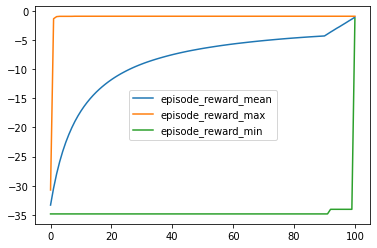

In [10]:
ax = None  # This plots everything on the same plot
for d in dfs.values():
    ax = d.episode_reward_mean.plot(ax=ax, legend=True)
    ax = d.episode_reward_max.plot(ax=ax, legend=True)
    ax = d.episode_reward_min.plot(ax=ax, legend=True)

In [12]:
import pandas as pd

In [25]:
df = pd.DataFrame(list(dfs.values())[0])
df

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,timesteps_this_iter,agent_timesteps_total,done,...,info/num_agent_steps_trained,info/last_target_update_ts,info/num_target_updates,perf/cpu_util_percent,perf/ram_util_percent,info/learner/default_policy/td_error,info/learner/default_policy/num_agent_steps_trained,info/learner/default_policy/learner_stats/mean_q,info/learner/default_policy/learner_stats/max_q,info/learner/default_policy/learner_stats/min_q
0,-30.725508,-34.824556,-33.307873,999.0,10,0,10000,100,10000,False,...,100,10000,1,59.191667,16.733333,[0.13020802 0.03007608 0.02735814 0.12177876 0...,100.0,0.011341,0.049570,-0.019441
1,-1.357664,-34.824556,-30.403308,999.0,1,0,11000,100,11000,False,...,100100,11000,1001,71.475472,16.998113,[-0.00302105 -0.00222278 -0.00106608 -0.005050...,100.0,-0.056572,-0.020863,-0.129800
2,-0.997335,-34.824556,-27.952811,999.0,1,0,12000,100,12000,False,...,200100,12000,2001,81.717391,17.013043,[-4.07505780e-04 -1.74432248e-03 3.41762602e-...,100.0,-0.075697,-0.034618,-0.150224
3,-0.947380,-34.824556,-25.875470,999.0,1,0,13000,100,13000,False,...,300100,13000,3001,71.474074,17.100000,[-2.6172847e-03 -2.3248643e-03 6.6492334e-03 ...,100.0,-0.091559,-0.057137,-0.169880
4,-0.947380,-34.824556,-24.100170,999.0,1,0,14000,100,14000,False,...,400100,14000,4001,84.908000,17.108000,[ 3.5360456e-04 -3.3387244e-03 -7.5404346e-04 ...,100.0,-0.108798,-0.074891,-0.187630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-0.932351,-34.035181,-2.384916,999.0,1,0,106000,100,106000,False,...,9600100,106000,96001,81.608696,18.600000,[-4.5324862e-03 -1.7433465e-03 -3.8335323e-03 ...,100.0,-0.366531,-0.364223,-0.410833
97,-0.932351,-34.035181,-2.067151,999.0,1,0,107000,100,107000,False,...,9700100,107000,97001,71.200000,18.600000,[-0.00327262 0.01320902 0.0060007 -0.004258...,100.0,-0.370432,-0.364960,-0.456002
98,-0.932351,-34.035181,-1.738886,999.0,1,0,108000,100,108000,False,...,9800100,108000,98001,81.760870,18.660870,[-0.00495279 0.0236353 -0.00510699 0.014227...,100.0,-0.368008,-0.365800,-0.404124
99,-0.932351,-34.035181,-1.424366,999.0,1,0,109000,100,109000,False,...,9900100,109000,99001,71.490385,18.721154,[ 2.9479265e-03 3.9463043e-03 2.4334490e-03 ...,100.0,-0.363751,-0.361382,-0.431298


In [26]:
df.to_csv('td3.csv') 

In [22]:
list(dfs.values())[0]['episode_reward_max']

0     -30.725508
1      -1.357664
2      -0.997335
3      -0.947380
4      -0.947380
         ...    
96     -0.932351
97     -0.932351
98     -0.932351
99     -0.932351
100    -0.932351
Name: episode_reward_max, Length: 101, dtype: float64

In [27]:
import ray.rllib.agents.ddpg as ddpg

In [28]:
checkpoint = analysis.get_best_checkpoint(
    metric="episode_reward_mean", 
    mode="max", 
    trial=analysis.trials[0]
)

In [29]:
agent = ddpg.TD3Trainer(config={"env":"MountainCarContinuous-v0","evaluation_interval":2,"evaluation_num_episodes": 20})
agent.restore(checkpoint)

2022-07-04 03:56:06,197	WARNING logger.py:337 -- Could not instantiate TBXLogger: No module named 'tensorboardX'.
2022-07-04 03:56:06,201	INFO trainer.py:2333 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also then want to set eager_tracing=True in order to reach similar execution speed as with static-graph mode.
2022-07-04 03:56:06,206	WARNING deprecation.py:47 -- DeprecationWarning: `evaluation_num_episodes` has been deprecated. Use ``evaluation_duration` and `evaluation_duration_unit=episodes`` instead. This will raise an error in the future!
2022-07-04 03:56:06,209	WARNING deprecation.py:47 -- DeprecationWarning: `config['prioritized_replay']` has been deprecated. Replay prioritization specified at new location config['replay_buffer_config']['prioritized_replay'] will be overwritten. This will raise an error in the future!
2022-07-04 03:56:06,210	WARNING deprecation.py:47 -- DeprecationW

Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.


2022-07-04 03:56:13,395	INFO trainable.py:589 -- Restored on 172.28.0.2 from checkpoint: /root/ray_results/TD3/TD3_MountainCarContinuous-v0_533c2_00000_0_2022-07-04_02-45-12/checkpoint_000101/checkpoint-101
2022-07-04 03:56:13,402	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 101, '_timesteps_total': 10100, '_time_total': 2690.936931848526, '_episodes_total': 110}


In [30]:
import os
os.system("Xvfb :1 -screen 0 1024x768x24 &")
os.environ['DISPLAY'] = ':1'

In [31]:
import gym

In [32]:
# Rendering Dependencies
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
# Gym Dependencies
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1
!pip install gym[box2d] > /dev/null 2>&1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 33.9 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [33]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

# Google Colab needs to render the environment to a virtual display
# we will record this as a video and play it after the training has finished
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[-1]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [34]:
game = "MountainCarContinuous-v0"

nr_of_runs = 10
current_run = 1

if current_run == nr_of_runs:
  env = wrap_env(gym.make(game))
else:
  env = gym.make(game)
observation = env.reset()
timestep = 0

while current_run < nr_of_runs+1:
    # render the current frame to the video recorder of Google Colab
    if current_run == nr_of_runs:
      env.render()
    
    # your agent goes here 
    # action_space.sample() results in a random action being picked
    action = agent.compute_action(observation)
    
    # apply the action to the real environment and forward the game
    observation, reward, done, info = env.step(action) 
    timestep += 1
    
    if done:
      # for Monte Carlo Method you will need to update your value matrix here
      # Temporal Difference Learning updates the value matrix in every step
      
      # this test ends after 'nr_of_runs' (default = 10)
      # change the variable at the top if you want to train longer (recommended) 
      print("run: "+ str(current_run) + " took " + str(timestep) + " timesteps")
      current_run += 1
      timestep = 0
      if current_run == nr_of_runs:
        # record the last run
        env.close()
        env = wrap_env(gym.make(game))
      else:
        env.close()
        env = gym.make(game)
      
      observation = env.reset()
show_video()  #only shows the last run
env.close()


2022-07-04 03:57:26,208	WARNING deprecation.py:47 -- DeprecationWarning: `compute_action` has been deprecated. Use `Trainer.compute_single_action()` instead. This will raise an error in the future!


run: 1 took 999 timesteps
run: 2 took 999 timesteps
run: 3 took 999 timesteps
run: 4 took 999 timesteps
run: 5 took 999 timesteps
run: 6 took 999 timesteps
run: 7 took 999 timesteps
run: 8 took 999 timesteps
run: 9 took 999 timesteps
run: 10 took 999 timesteps


**This Section is only for resources**

In [ ]:
game = "MountainCarContinuous-v0"
# other interesting and simple environments: Pong-v0, MsPacman-v0, CarRacing-v0

nr_of_runs = 10
current_run = 1

if current_run == nr_of_runs:
  env = wrap_env(gym.make(game))
else:
  env = gym.make(game)
observation = env.reset()
timestep = 0

while current_run < nr_of_runs+1:
    # render the current frame to the video recorder of Google Colab
    if current_run == nr_of_runs:
      env.render()
    
    # your agent goes here 
    # action_space.sample() results in a random action being picked
    action = env.action_space.sample()
    
    # apply the action to the real environment and forward the game
    observation, reward, done, info = env.step(action) 
    timestep += 1
    
    if done:
      # for Monte Carlo Method you will need to update your value matrix here
      # Temporal Difference Learning updates the value matrix in every step
      
      # this test ends after 'nr_of_runs' (default = 10)
      # change the variable at the top if you want to train longer (recommended) 
      print("run: "+ str(current_run) + " took " + str(timestep) + " timesteps")
      current_run += 1
      timestep = 0
      if current_run == nr_of_runs:
        # record the last run
        env.close()
        env = wrap_env(gym.make(game))
      else:
        env.close()
        env = gym.make(game)
      
      observation = env.reset()
      show_video()  #only shows the last run
env.close()


run: 1 took 999 timesteps


run: 2 took 999 timesteps


run: 3 took 999 timesteps


run: 4 took 999 timesteps


run: 5 took 999 timesteps


run: 6 took 999 timesteps


run: 7 took 999 timesteps


run: 8 took 999 timesteps


run: 9 took 999 timesteps


run: 10 took 999 timesteps
